In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_excel("HousePricePrediction.xlsx")

# Printing first 5 records of the dataset
print(dataset.head(10))


   Id  MSSubClass  LotArea LotConfig BldgType  OverallCond  YearBuilt  \
0   0          60     8450    Inside     1Fam            5       2003   
1   1          20     9600       FR2     1Fam            8       1976   
2   2          60    11250    Inside     1Fam            5       2001   
3   3          70     9550    Corner     1Fam            5       1915   
4   4          60    14260       FR2     1Fam            5       2000   
5   5          50    14115    Inside     1Fam            5       1993   
6   6          20    10084    Inside     1Fam            5       2004   
7   7          60    10382    Corner     1Fam            6       1973   
8   8          50     6120    Inside     1Fam            5       1931   
9   9         190     7420    Corner   2fmCon            6       1939   

   YearRemodAdd Exterior1st  TotalBsmtSF  SalePrice  
0          2003     VinylSd        856.0   208500.0  
1          1976     MetalSd       1262.0   181500.0  
2          2002     VinylSd       

In [22]:
obj = (dataset.dtypes == 'object')
obj_cols = list(obj[obj].index)
print("Categorical variables:",len(obj_cols))

int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))


Categorical variables: 3
Integer variables: 6
Float variables: 2


In [23]:
dataset.shape


(2919, 11)

<ipython-input-24-fa8390457e13>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),


<Axes: >

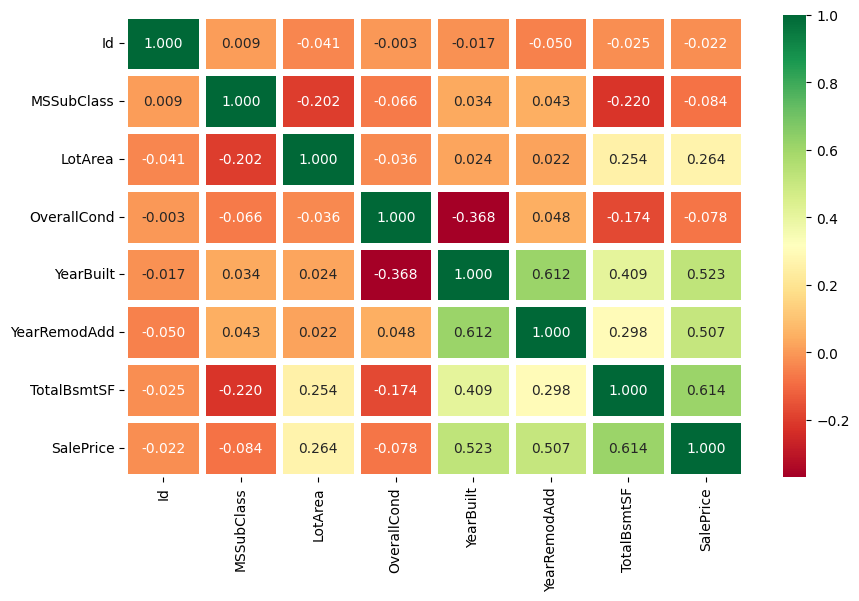

In [24]:
plt.figure(figsize=(10, 6))
sns.heatmap(dataset.corr(),
			cmap = "RdYlGn",
			fmt = '.3f',
			linewidths = 5,
			annot = True)


<Axes: title={'center': 'No. Unique values of Categorical Features'}>

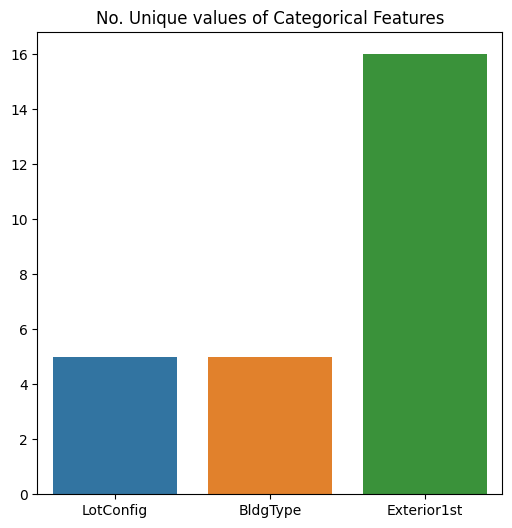

In [25]:
unique_values = []
for col in obj_cols:
  unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(6,6))
plt.title('No. Unique values of Categorical Features')
#plt.xticks(rotation=90)
sns.barplot(x=obj_cols,y=unique_values)


<ipython-input-26-c261d12ee5bf>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(11, 4, index)


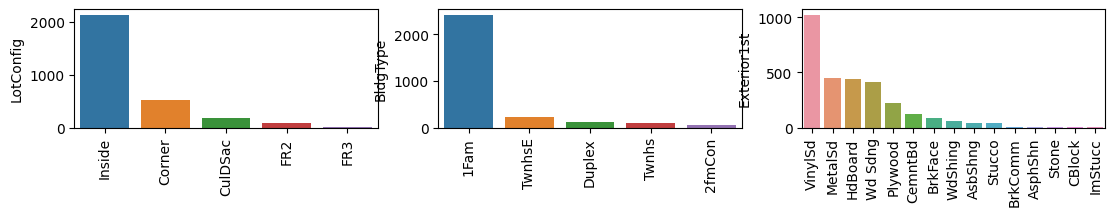

In [26]:
plt.figure(figsize=(18,20))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1
for col in obj_cols:
	y = dataset[col].value_counts()
	plt.subplot(11, 4, index)
	plt.xticks(rotation=90)
	sns.barplot(x=list(y.index), y=y)
	index += 1


<ipython-input-27-0de4f72672ca>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset['SalePrice'],shade=True)


<Axes: xlabel='SalePrice', ylabel='Density'>

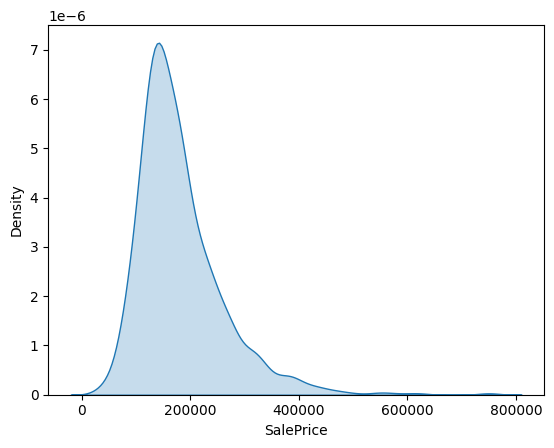

In [27]:
sns.kdeplot(data=dataset['SalePrice'],shade=True)

<Axes: xlabel='SalePrice', ylabel='LotArea'>

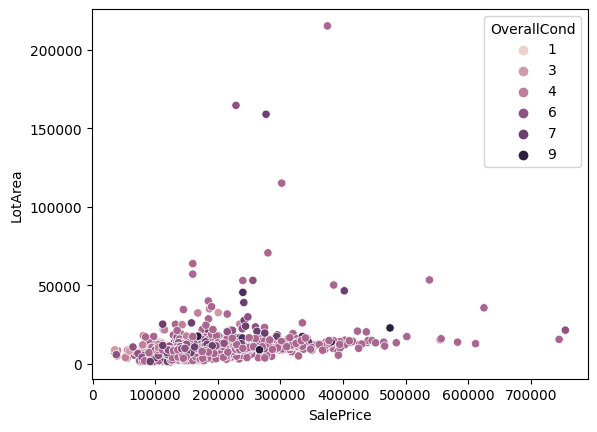

In [28]:
sns.scatterplot(x=dataset['SalePrice'],y=dataset['LotArea'],hue=dataset['OverallCond'])

In [29]:
dataset.drop(['Id'],
			axis=1,
			inplace=True)
dataset['SalePrice'] = dataset['SalePrice'].fillna(
dataset['SalePrice'].mode())



In [30]:
new_dataset = dataset.dropna()
new_dataset.isnull().sum()



MSSubClass      0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [31]:
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
obj_cols = list(s[s].index)
print("Categorical variables:")
print(obj_cols)
print('No. of. categorical features: ',
	len(obj_cols))


Categorical variables:
['LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  3


In [32]:
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[obj_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_dataset.drop(obj_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [33]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

# Split the training set into
# training and validation set
X_train, X_test, Y_train, Y_test = train_test_split(
	X, Y, train_size=0.5) #test_size=0.5, random_state=0)


In [34]:
print(X)

      MSSubClass  LotArea  OverallCond  YearBuilt  YearRemodAdd  TotalBsmtSF  \
0             60     8450            5       2003          2003        856.0   
1             20     9600            8       1976          1976       1262.0   
2             60    11250            5       2001          2002        920.0   
3             70     9550            5       1915          1970        756.0   
4             60    14260            5       2000          2000       1145.0   
...          ...      ...          ...        ...           ...          ...   
1455          60     7917            5       1999          2000        953.0   
1456          20    13175            6       1978          1988       1542.0   
1457          70     9042            9       1941          2006       1152.0   
1458          20     9717            6       1950          1996       1078.0   
1459          20     9937            6       1965          1965       1256.0   

      LotConfig_Corner  LotConfig_CulDS

In [35]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_test)
print("Training data accuracy",model_RFR.score(X_train,Y_train))
print("Testing data accuracy",model_RFR.score(X_test,Y_test))

mean_absolute_percentage_error(Y_test, Y_pred)


Training data accuracy 0.9474812017164281
Testing data accuracy 0.7079610862010415


0.1500069224821947

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import numpy as np
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_test)
print("By using Linear Regression we got:")
print("Training data accuracy",model_LR.score(X_train,Y_train))
print("Testing data accuracy",model_LR.score(X_test,Y_test))

print(mean_absolute_percentage_error(Y_test, Y_pred))


By using Linear Regression we got:
Training data accuracy 0.5946812612912963
Testing data accuracy 0.5830634228803417
0.19725082993413984


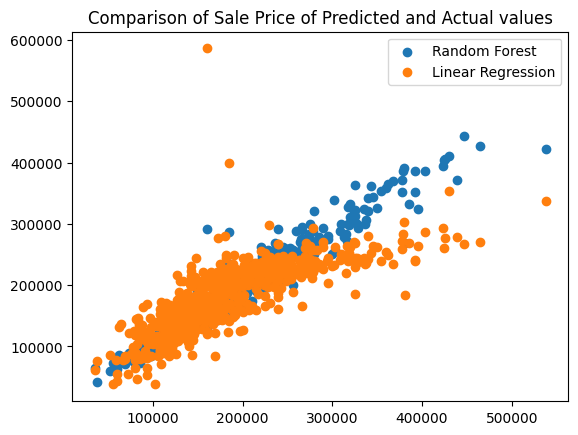

In [37]:
plt.figure()
plt.title('Comparison of Sale Price of Predicted and Actual values')
plt.scatter(Y_train,model_RFR.predict(X_train),label='Random Forest')
plt.scatter(Y_train,model_LR.predict(X_train),label='Linear Regression')
plt.legend()